In [9]:
import sys

sys.path.append('..')

In [2]:
from modelacc import *
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
test_image = get_sample_test_image_path()

# display the image
image = preprocess_image(test_image, target_size=640, transpose=True)
image.shape

(1, 3, 640, 640)

In [13]:
# use yolo to inference
from ultralytics import YOLO

In [31]:
BEST_MODEL_PATH = os.path.join(get_root_dir(), "runs/segment/train/weights/best.pt")

In [32]:
model = YOLO(BEST_MODEL_PATH)


In [33]:
yolo_classes = list(model.names.values())

In [37]:
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]
classes_ids

[0]

In [39]:
conf = 0.2
results = model.predict(test_image, conf=conf)


image 1/1 /home/crinstaniev/Dev/BrainTumorTRTAcc/data/test/images/y188_jpg.rf.8c5a0d881db1c734e6dbe3e68b5cd8ed.jpg: 640x640 1 object, 78.9ms
Speed: 4.0ms preprocess, 78.9ms inference, 23.5ms postprocess per image at shape (1, 3, 640, 640)


In [49]:
import cv2

In [50]:
colors = [random.choice(range(256)) for _ in classes_ids]

In [53]:
img = cv2.imread(test_image)

for result in results:
    for mask, box in zip(result.masks.xy, result.boxes):
        points = np.int32([mask])
        color_number = classes_ids.index(int(box.cls[0]))
        cv2.fillPoly(img, points, colors[color_number])

In [55]:
cv2.imwrite("output.jpg", img)

True

In [ ]:
from ultralytics import YOLO

model = YOLO("/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.pt")

In [28]:
model.export(
    format="onnx",
    dynamic=False,  
    imgsz=640,
    batch=1,  
    workspace=4,  
    int8=False,
    data="/home/crinstaniev/Dev/BrainTumorTRTAcc/data/data.yaml",  
)

Ultralytics 8.3.36 🚀 Python-3.12.7 torch-2.5.1 CPU (13th Gen Intel Core(TM) i5-13600K)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs

PyTorch: starting from '/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (5.7 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.41...
ONNX: export success ✅ 0.6s, saved as '/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.onnx' (11.1 MB)

Export complete (0.9s)
Results saved to /home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights
Predict:         yolo predict task=segment model=/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.onnx imgsz=640 data=/home/users/xt37/zz/data/

'/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.onnx'

In [ ]:
model = YOLO("/home/crinstaniev/Dev/BrainTumorTRTAcc/model.plan")

# model = YOLO("/home/crinstaniev/Dev/BrainTumorTRTAcc/trt/best.engine", task='segment')

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [38]:
from modelacc import *
import matplotlib.pyplot as plt

In [39]:
test_image = get_sample_test_image_path()

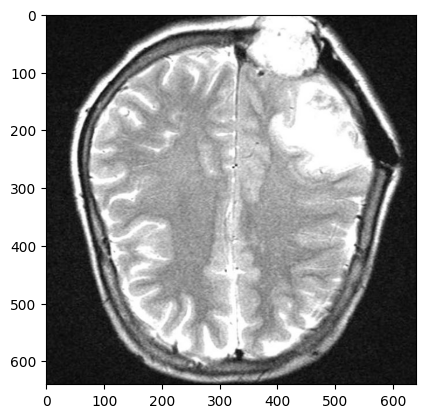

In [40]:
# show test image
image = Image.open(test_image)
plt.imshow(image)

In [41]:
result = model.predict(test_image)

TypeError: model='/home/crinstaniev/Dev/BrainTumorTRTAcc/model.trt' is not a supported model format. Ultralytics supports: ('PyTorch', 'TorchScript', 'ONNX', 'OpenVINO', 'TensorRT', 'CoreML', 'TensorFlow SavedModel', 'TensorFlow GraphDef', 'TensorFlow Lite', 'TensorFlow Edge TPU', 'TensorFlow.js', 'PaddlePaddle', 'MNN', 'NCNN', 'IMX')
See https://docs.ultralytics.com/modes/predict for help.

In [ ]:
result[0].show()

Use of uninitialized value $file in open at /usr/share/perl5/File/MimeInfo/Applications.pm line 140.
Use of uninitialized value $file in open at /usr/share/perl5/File/MimeInfo/Applications.pm line 140.
Use of uninitialized value in subroutine entry at /usr/share/perl5/File/BaseDir.pm line 105.
Use of uninitialized value in subroutine entry at /usr/share/perl5/File/BaseDir.pm line 105.
Use of uninitialized value in subroutine entry at /usr/share/perl5/File/BaseDir.pm line 105.
Use of uninitialized value in subroutine entry at /usr/share/perl5/File/BaseDir.pm line 105.
Use of uninitialized value $file in open at /usr/share/perl5/File/MimeInfo/Applications.pm line 140.
Use of uninitialized value $file in open at /usr/share/perl5/File/MimeInfo/Applications.pm line 140.
Use of uninitialized value in subroutine entry at /usr/share/perl5/File/BaseDir.pm line 105.
Use of uninitialized value in subroutine entry at /usr/share/perl5/File/BaseDir.pm line 105.
Use of uninitialized value in subrouti

Opening "/tmp/tmpc2yyt128.PNG" with ImageMagick (color depth=q16)  (image/png)
